In [1]:
using PyPlot
matplotlib[:rcdefaults]()

In [2]:
using BSplines

---

Define knot set:

In [3]:
a,b,N = 0,1,20
t = linear_knot_set(a, b, N)
x = linspace(a,b,1000) # Only used to evaluate the spline basis functions

linspace(0.0,1.0,1000)

In [4]:
k = 7 # Required spline order
@time basis = BSplineBasis(k,t,x);

  0.425858 seconds (634.38 k allocations: 33.299 MB, 1.44% gc time)


Plot basis functions:

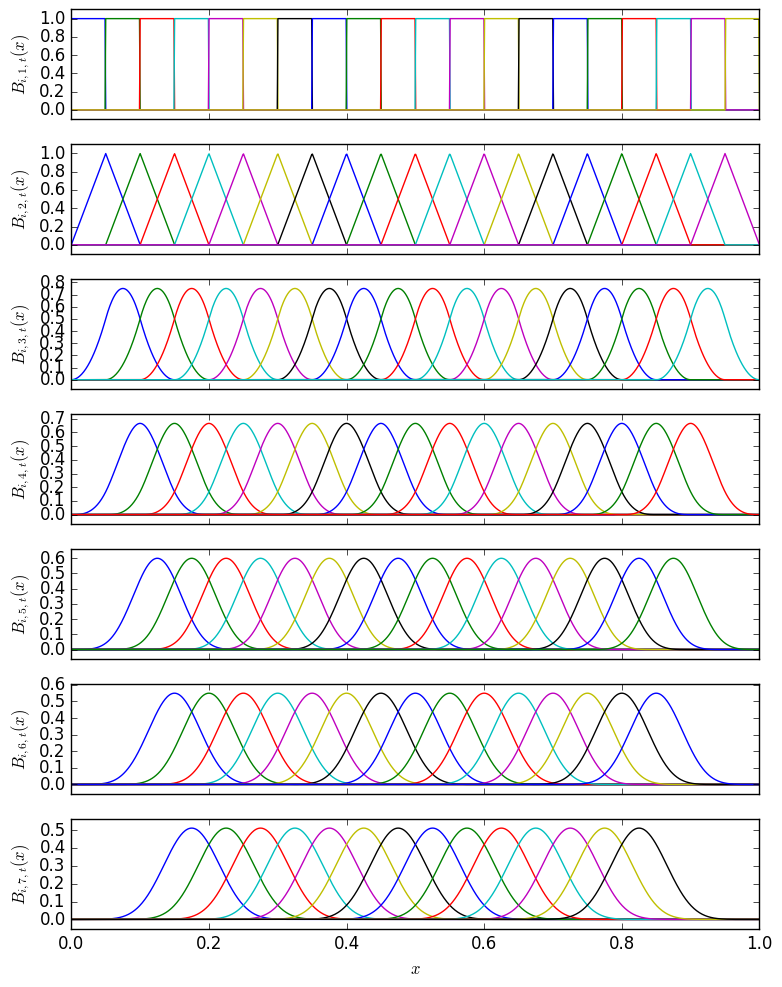

In [5]:
figure(figsize=(8,10))
for kk = 1:k
    subplot(k,1,kk)
    plot(x,basis.B[kk])
    margins(0,0.1)
    if kk<k
        gca()[:set_xticklabels]([])
    end
    ylabel(latexstring("\$B_{i,$kk,t}(x)\$"))
end
xlabel(L"x")
tight_layout()
gcf()

---

Test spline:

In [6]:
l = (N-k+1)
s = BSpline((1.0:l)/l, k)

BSplines.BSpline(0.07142857142857142:0.07142857142857142:0.9999999999999999,7)

In [7]:
f = basis(s)

1000-element Array{Float64,1}:
 0.0        
 6.38744e-15
 4.08796e-13
 4.65644e-12
 2.61629e-11
 9.98037e-11
 2.98012e-10
 7.51475e-10
 1.67443e-9 
 3.39454e-9 
 6.38744e-9 
 1.13157e-8 
 1.90728e-8 
 ⋮          
 1.5842e-7  
 8.94241e-8 
 4.75236e-8 
 2.3442e-8  
 1.05207e-8 
 4.17217e-9 
 1.39725e-9 
 3.66281e-10
 6.51902e-11
 5.72314e-12
 8.94241e-14
 0.0        

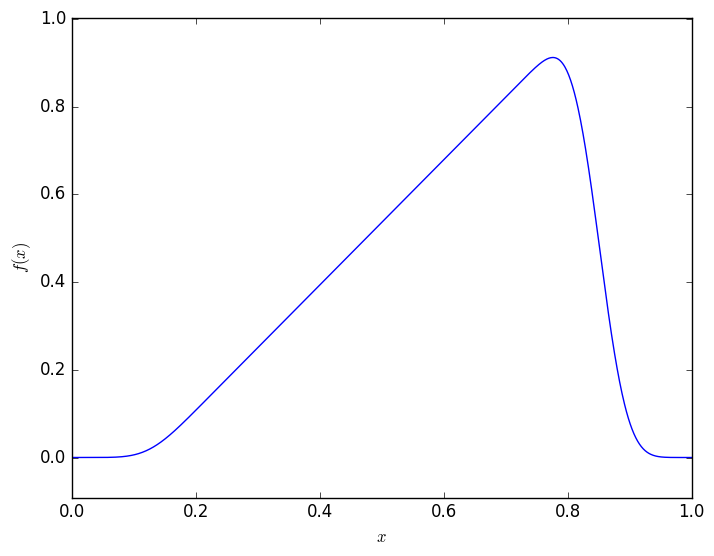

In [8]:
figure()
plot(x,f)
margins(0,0.1)
xlabel(L"x")
ylabel(L"f(x)")
gcf()